In [8]:
import pandas_datareader as pdr
key="c4c900170eb9776ee228dd9db0886133b979af0c"


In [9]:
import requests

headers = {
        'Content-Type': 'application/json'
        }
requestResponse = requests.get("https://api.tiingo.com/api/test?token=c4c900170eb9776ee228dd9db0886133b979af0c",
                                    headers=headers)
print(requestResponse.json())

{'message': 'You successfully sent a request'}


In [12]:
df = pdr.get_data_tiingo('data', api_key='c4c900170eb9776ee228dd9db0886133b979af0c')

In [16]:

df.to_csv('data.csv')

In [17]:
import pandas as pd

In [18]:
df=pd.read_csv('data.csv')

In [19]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,data,2015-07-30 00:00:00+00:00,106.84,111.89,103.00,111.78,3436133,106.84,111.89,103.00,111.78,3436133,0.0,1.0
1,data,2015-07-31 00:00:00+00:00,104.74,107.61,104.32,106.48,1295449,104.74,107.61,104.32,106.48,1295449,0.0,1.0
2,data,2015-08-03 00:00:00+00:00,101.34,105.78,99.17,104.29,2714752,101.34,105.78,99.17,104.29,2714752,0.0,1.0
3,data,2015-08-04 00:00:00+00:00,101.18,101.63,98.93,100.54,1374315,101.18,101.63,98.93,100.54,1374315,0.0,1.0
4,data,2015-08-05 00:00:00+00:00,103.94,104.73,101.60,101.60,1149906,103.94,104.73,101.60,101.60,1149906,0.0,1.0


In [21]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1015,data,2019-08-12 00:00:00+00:00,169.53,169.53,169.53,169.53,0,169.53,169.53,169.53,169.53,0,0.0,1.0
1016,data,2019-08-13 00:00:00+00:00,169.53,169.53,169.53,169.53,0,169.53,169.53,169.53,169.53,0,0.0,1.0
1017,data,2019-08-14 00:00:00+00:00,169.53,169.53,169.53,169.53,0,169.53,169.53,169.53,169.53,0,0.0,1.0
1018,data,2019-08-15 00:00:00+00:00,169.53,169.53,169.53,169.53,0,169.53,169.53,169.53,169.53,0,0.0,1.0
1019,data,2019-08-19 00:00:00+00:00,169.53,169.53,169.53,169.53,0,169.53,169.53,169.53,169.53,0,0.0,1.0


In [22]:
df1=df.reset_index()['close']
df1

0       106.84
1       104.74
2       101.34
3       101.18
4       103.94
         ...  
1015    169.53
1016    169.53
1017    169.53
1018    169.53
1019    169.53
Name: close, Length: 1020, dtype: float64

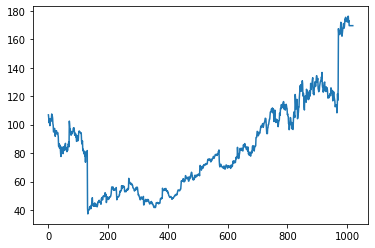

In [24]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [26]:
import numpy as np
df1

0       106.84
1       104.74
2       101.34
3       101.18
4       103.94
         ...  
1015    169.53
1016    169.53
1017    169.53
1018    169.53
1019    169.53
Name: close, Length: 1020, dtype: float64

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [28]:
print(df1)

[[0.50115174]
 [0.48603513]
 [0.46156061]
 ...
 [0.95241866]
 [0.95241866]
 [0.95241866]]


In [29]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [30]:
training_size,test_size

(663, 357)

In [31]:
train_data

array([[0.50115174],
       [0.48603513],
       [0.46156061],
       [0.46040887],
       [0.48027642],
       [0.44651598],
       [0.46465592],
       [0.47998848],
       [0.46746329],
       [0.47386985],
       [0.48250792],
       [0.50547077],
       [0.49863231],
       [0.49539303],
       [0.48473942],
       [0.4562338 ],
       [0.44817161],
       [0.41462712],
       [0.41498704],
       [0.42571264],
       [0.43269508],
       [0.43147135],
       [0.40994817],
       [0.39231212],
       [0.41952203],
       [0.4164987 ],
       [0.41361935],
       [0.42067377],
       [0.40454938],
       [0.40620501],
       [0.40728477],
       [0.41153182],
       [0.40159804],
       [0.39087244],
       [0.34257126],
       [0.34163547],
       [0.35459257],
       [0.33314138],
       [0.34077167],
       [0.34818601],
       [0.3294702 ],
       [0.30254823],
       [0.29052692],
       [0.30636337],
       [0.32378347],
       [0.33897207],
       [0.33090988],
       [0.314

In [32]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [33]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [34]:
print(X_train.shape), print(y_train.shape)

(562, 100)
(562,)


(None, None)

In [35]:
print(X_test.shape), print(ytest.shape)

(256, 100)
(256,)


(None, None)

In [36]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [37]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [38]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Train on 562 samples, validate on 256 samples
Epoch 1/100
562/562 [==============================] - 21s 37ms/sample - loss: 0.0115 - val_loss: 0.0935
Epoch 2/100
562/562 [==============================] - 5s 9ms/sample - loss: 0.0044 - val_loss: 0.0363
Epoch 3/100
562/562 [==============================] - 5s 9ms/sample - loss: 0.0028 - val_loss: 0.0312
Epoch 4/100
562/562 [==============================] - 5s 9ms/sample - loss: 0.0022 - val_loss: 0.0063
Epoch 5/100
562/562 [==============================] - 5s 9ms/sample - loss: 0.0020 - val_loss: 0.0124
Epoch 6/100
562/562 [==============================] - 5s 9ms/sample - loss: 0.0019 - val_loss: 0.0209
Epoch 7/100
562/562 [==============================] - 5s 9ms/sample - loss: 0.0016 - val_loss: 0.0087
Epoch 8/100
562/562 [==============================] - 5s 9ms/sample - loss: 0.0015 - val_loss: 0.0067
Epoch 9/100
562/562 [==============================] - 5s 9ms/sample - loss: 0.0014 - val_loss: 0.0083
Epoch 10/100
562/562 [===

562/562 [==============================] - 5s 8ms/sample - loss: 4.9533e-04 - val_loss: 0.0037
Epoch 78/100
562/562 [==============================] - 5s 8ms/sample - loss: 4.8662e-04 - val_loss: 0.0038
Epoch 79/100
562/562 [==============================] - 5s 9ms/sample - loss: 5.2457e-04 - val_loss: 0.0060
Epoch 80/100
562/562 [==============================] - 5s 9ms/sample - loss: 4.6449e-04 - val_loss: 0.0033
Epoch 81/100
562/562 [==============================] - 5s 10ms/sample - loss: 4.3481e-04 - val_loss: 0.0087
Epoch 82/100
562/562 [==============================] - 5s 9ms/sample - loss: 4.7387e-04 - val_loss: 0.0055
Epoch 83/100
562/562 [==============================] - 5s 9ms/sample - loss: 4.4435e-04 - val_loss: 0.0100
Epoch 84/100
562/562 [==============================] - 5s 9ms/sample - loss: 4.3125e-04 - val_loss: 0.0099
Epoch 85/100
562/562 [==============================] - 5s 9ms/sample - loss: 4.5443e-04 - val_loss: 0.0093
Epoch 86/100
562/562 [==================

In [62]:
len(test_data)


357

In [63]:
x_input=test_data[257:].reshape(1,-1)
x_input.shape

(1, 100)

In [64]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [65]:
temp_input

[0.6160380074863232,
 0.6269075727037146,
 0.6482867837604378,
 0.6637633170169883,
 0.6642672041462714,
 0.6672905269219696,
 0.6218687014108841,
 0.6246040886841349,
 0.6216527497840485,
 0.6192052980132452,
 0.6427440253383243,
 0.6348257990210193,
 0.6246760725597467,
 0.6379930895479413,
 0.6289951050964584,
 0.6053124100201557,
 0.585588828102505,
 0.5917794414051254,
 0.5948027641808236,
 0.5944428448027643,
 0.588324215375756,
 0.6009213936078319,
 0.5999136193492658,
 0.6089116038007487,
 0.6012093291102794,
 0.5977541030809099,
 0.6377051540454939,
 0.6149582493521453,
 0.6091995393031961,
 0.6198531528937519,
 0.6174057011229486,
 0.6246760725597467,
 0.5719118917362511,
 0.5942988770515405,
 0.6063921681543334,
 0.6177656205010078,
 0.6086956521739131,
 0.5889000863806508,
 0.579326230924273,
 0.5710480852289088,
 0.542038583357328,
 0.5450619061330262,
 0.5524042614454363,
 0.5518283904405414,
 0.5455657932623095,
 0.5416786639792688,
 0.5113734523466744,
 0.54175064785488

In [66]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape(( 1,n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape(( 1,n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.8456514]
101
1 day input [0.62690757 0.64828678 0.66376332 0.6642672  0.66729053 0.6218687
 0.62460409 0.62165275 0.6192053  0.64274403 0.6348258  0.62467607
 0.63799309 0.62899511 0.60531241 0.58558883 0.59177944 0.59480276
 0.59444284 0.58832422 0.60092139 0.59991362 0.6089116  0.60120933
 0.5977541  0.63770515 0.61495825 0.60919954 0.61985315 0.6174057
 0.62467607 0.57191189 0.59429888 0.60639217 0.61776562 0.60869565
 0.58890009 0.57932623 0.57104809 0.54203858 0.54506191 0.55240426
 0.55182839 0.54556579 0.54167866 0.51137345 0.54175065 0.60739994
 0.5750072  0.63338612 0.93715808 0.9142672  0.92427296 0.92254535
 0.90721278 0.9134034  0.91570688 0.94450043 0.96940685 0.96199251
 0.92988771 0.90354161 0.89893464 0.91541895 0.92715232 0.94219695
 0.94853153 0.96314426 0.95450619 0.93967751 0.94824359 0.96724734
 0.98581918 0.98200403 0.99474518 0.97350993 0.9861791  0.98329974
 0.97444572 0.98150014 0.97055859 0.99848834 0.99395335 1.
 0.97149439 0.977685   0.95241866 0.95241866

8 day output [[0.68006516]]
9 day input [0.6192053  0.64274403 0.6348258  0.62467607 0.63799309 0.62899511
 0.60531241 0.58558883 0.59177944 0.59480276 0.59444284 0.58832422
 0.60092139 0.59991362 0.6089116  0.60120933 0.5977541  0.63770515
 0.61495825 0.60919954 0.61985315 0.6174057  0.62467607 0.57191189
 0.59429888 0.60639217 0.61776562 0.60869565 0.58890009 0.57932623
 0.57104809 0.54203858 0.54506191 0.55240426 0.55182839 0.54556579
 0.54167866 0.51137345 0.54175065 0.60739994 0.5750072  0.63338612
 0.93715808 0.9142672  0.92427296 0.92254535 0.90721278 0.9134034
 0.91570688 0.94450043 0.96940685 0.96199251 0.92988771 0.90354161
 0.89893464 0.91541895 0.92715232 0.94219695 0.94853153 0.96314426
 0.95450619 0.93967751 0.94824359 0.96724734 0.98581918 0.98200403
 0.99474518 0.97350993 0.9861791  0.98329974 0.97444572 0.98150014
 0.97055859 0.99848834 0.99395335 1.         0.97149439 0.977685
 0.95241866 0.95241866 0.95241866 0.95241866 0.95241866 0.95241866
 0.95241866 0.95241866 0.

16 day output [[0.64357865]]
17 day input [0.59177944 0.59480276 0.59444284 0.58832422 0.60092139 0.59991362
 0.6089116  0.60120933 0.5977541  0.63770515 0.61495825 0.60919954
 0.61985315 0.6174057  0.62467607 0.57191189 0.59429888 0.60639217
 0.61776562 0.60869565 0.58890009 0.57932623 0.57104809 0.54203858
 0.54506191 0.55240426 0.55182839 0.54556579 0.54167866 0.51137345
 0.54175065 0.60739994 0.5750072  0.63338612 0.93715808 0.9142672
 0.92427296 0.92254535 0.90721278 0.9134034  0.91570688 0.94450043
 0.96940685 0.96199251 0.92988771 0.90354161 0.89893464 0.91541895
 0.92715232 0.94219695 0.94853153 0.96314426 0.95450619 0.93967751
 0.94824359 0.96724734 0.98581918 0.98200403 0.99474518 0.97350993
 0.9861791  0.98329974 0.97444572 0.98150014 0.97055859 0.99848834
 0.99395335 1.         0.97149439 0.977685   0.95241866 0.95241866
 0.95241866 0.95241866 0.95241866 0.95241866 0.95241866 0.95241866
 0.95241866 0.95241866 0.95241866 0.95241866 0.95241866 0.84565139
 0.81855714 0.7841984

24 day output [[0.51045847]]
25 day input [0.5977541  0.63770515 0.61495825 0.60919954 0.61985315 0.6174057
 0.62467607 0.57191189 0.59429888 0.60639217 0.61776562 0.60869565
 0.58890009 0.57932623 0.57104809 0.54203858 0.54506191 0.55240426
 0.55182839 0.54556579 0.54167866 0.51137345 0.54175065 0.60739994
 0.5750072  0.63338612 0.93715808 0.9142672  0.92427296 0.92254535
 0.90721278 0.9134034  0.91570688 0.94450043 0.96940685 0.96199251
 0.92988771 0.90354161 0.89893464 0.91541895 0.92715232 0.94219695
 0.94853153 0.96314426 0.95450619 0.93967751 0.94824359 0.96724734
 0.98581918 0.98200403 0.99474518 0.97350993 0.9861791  0.98329974
 0.97444572 0.98150014 0.97055859 0.99848834 0.99395335 1.
 0.97149439 0.977685   0.95241866 0.95241866 0.95241866 0.95241866
 0.95241866 0.95241866 0.95241866 0.95241866 0.95241866 0.95241866
 0.95241866 0.95241866 0.95241866 0.84565139 0.81855714 0.7841984
 0.75170863 0.72498786 0.70508957 0.69168389 0.68378234 0.68006516
 0.6790517  0.67923069 0.67918

In [67]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [68]:
import matplotlib.pyplot as plt

In [69]:
len(df1)

1020

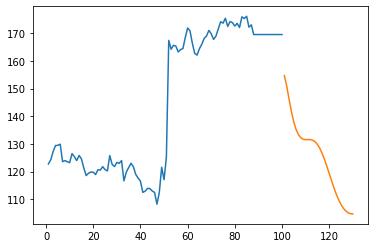

In [70]:
plt.plot(day_new,scaler.inverse_transform(df1[920:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

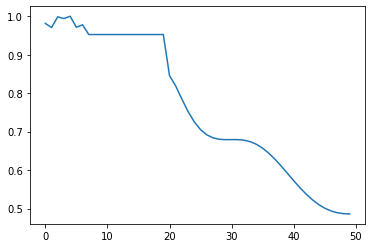

In [82]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])

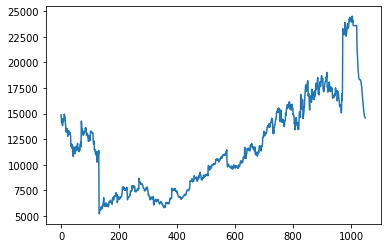

In [84]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)
